In [1]:
pip install mplsoccer

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch
import seaborn as sns

In [3]:
#Read in the data
df = pd.read_csv('events_VLL_ELC_J13.csv')

In [4]:
df.head()


,Team,Player,Event,Mins,Secs,X,Y,X2,Y2
0,Home,H4,Pass,0,0,98,4,91,73
1,Home,Plata,Shot Assist,0,0,98,80,87,35
2,Home,Javi Sanchez,Shot,0,0,85,34,100,51
3,Home,Plata,Shot Assist,0,0,5,16,11,44
4,Home,Roque Mesa,Shot,0,0,10,41,1,43


In [5]:
#convert the data to match the mplsoccer statsbomb pitch
#to see how to create the pitch, watch the video here: https://www.youtube.com/watch?v=55k1mCRyd2k
df['x'] = df['X']*1.2
df['y'] = df['Y']*.8
df['endX'] = df['X2']*1.2
df['endY'] = df['Y2']*.8

In [6]:
df

,Team,Player,Event,Mins,Secs,X,Y,X2,Y2,x,y,endX,endY
0,Home,H4,Pass,0,0,98,4,91,73,117.6,3.2,109.2,58.4
1,Home,Plata,Shot Assist,0,0,98,80,87,35,117.6,64.0,104.4,28.0
2,Home,Javi Sanchez,Shot,0,0,85,34,100,51,102.0,27.2,120.0,40.8
3,Home,Plata,Shot Assist,0,0,5,16,11,44,6.0,12.8,13.2,35.2
4,Home,Roque Mesa,Shot,0,0,10,41,1,43,12.0,32.8,1.2,34.4
5,Away,A4,Pass,0,0,58,21,70,60,69.6,16.8,84.0,48.0
6,Away,A5,Pass,0,0,68,60,88,61,81.6,48.0,105.6,48.8
7,Away,A6,Shot,0,0,88,63,100,43,105.6,50.4,120.0,34.4


Text(0.5, 1.0, 'La Liga Match: Real Valladolid vs Elche J13')

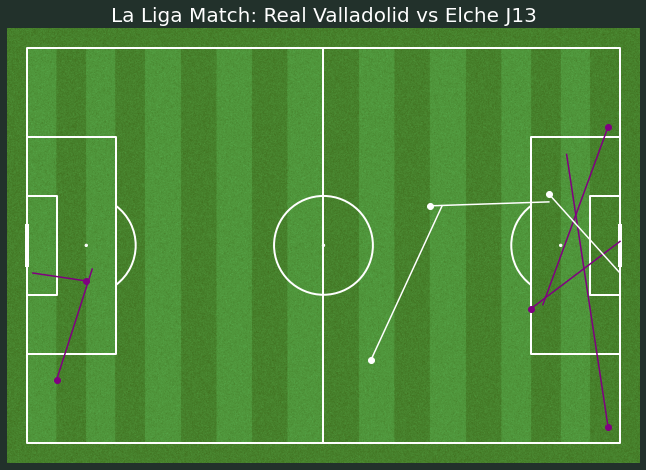

In [22]:
fig ,ax = plt.subplots(figsize=(13.5,8))
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')

#this is how we create the pitch
pitch = Pitch(pitch_color='grass', line_color='white', stripe=True,)

#Draw the pitch on the ax figure as well as invert the axis for this specific pitch
pitch.draw(ax=ax,figsize=(25, 10))
plt.gca().invert_yaxis()

#use a for loop to plot each pass
for x in range(len(df['x'])):
    if df['Team'][x] == 'Home':
        plt.plot((df['x'][x],df['endX'][x]),(df['y'][x],df['endY'][x]),color='purple')
        plt.scatter(df['x'][x],df['y'][x],color='purple')
    if df['Team'][x] == 'Away':
        plt.plot((df['x'][x],df['endX'][x]),(df['y'][x],df['endY'][x]),color='white')
        plt.scatter(df['x'][x],df['y'][x],color='white')

plt.title('La Liga Match: Real Valladolid vs Elche J13',color='white',size=20)


In [25]:
fig.savefig('goals_J13.png')